# Some things

In [26]:
import os
os.environ['NUMPY_EXPERIMENTAL_ARRAY_FUNCTION'] = '0'

from matplotlib import pyplot as plt
import numpy as np
import xarray as xr
import gcsfs
from xhistogram.xarray import histogram

%matplotlib inline
plt.rcParams['figure.figsize'] = 12, 6
%config InlineBackend.figure_format = 'retina' 

In [27]:
#This code defines a function that lets us read the data later
def read_data(uri):
    gcs = gcsfs.GCSFileSystem(token='anon')
    ds = xr.open_zarr(gcs.get_mapper(uri), consolidated=True)
    return ds

In [41]:
#Here is where you pick what variable you want to look at.
table_id='Omon'
variable_id='o2'

#Now pick what model you want to look at
source_id='IPSL-CM6A-LR'
experiment_id='historical'

#first we load the catalogue
import pandas as pd
df = pd.read_csv('https://storage.googleapis.com/pangeo-cmip6/pangeo-cmip6-zarr-consolidated-stores.csv')

In [42]:
#Then we load the variable you want
df_var = df[(df.table_id == table_id) & (df.variable_id == variable_id) &  (df.grid_label=='gn')]
uri = df_var[(df_var.source_id == source_id) &
                         (df_var.experiment_id == experiment_id) ].zstore.values[0]
df_var

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year
1453,CMIP,CCCma,CanESM5,historical,r10i1p1f1,Omon,o2,gn,gs://cmip6/CMIP/CCCma/CanESM5/historical/r10i1...,NaN
5406,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r2i1p1f2,Omon,o2,gn,gs://cmip6/CMIP/CNRM-CERFACS/CNRM-ESM2-1/histo...,NaN
6536,CMIP,IPSL,IPSL-CM6A-LR,historical,r10i1p1f1,Omon,o2,gn,gs://cmip6/CMIP/IPSL/IPSL-CM6A-LR/historical/r...,NaN
9243,CMIP,MIROC,MIROC-ES2L,historical,r1i1p1f2,Omon,o2,gn,gs://cmip6/CMIP/MIROC/MIROC-ES2L/historical/r1...,NaN
10494,CMIP,MOHC,UKESM1-0-LL,historical,r1i1p1f2,Omon,o2,gn,gs://cmip6/CMIP/MOHC/UKESM1-0-LL/historical/r1...,NaN
19024,OMIP,CNRM-CERFACS,CNRM-ESM2-1,omip1,r1i1p1f2,Omon,o2,gn,gs://cmip6/OMIP/CNRM-CERFACS/CNRM-ESM2-1/omip1...,NaN
19052,OMIP,IPSL,IPSL-CM6A-LR,omip1,r1i1p1f1,Omon,o2,gn,gs://cmip6/OMIP/IPSL/IPSL-CM6A-LR/omip1/r1i1p1...,NaN
19107,OMIP,NCAR,CESM2,omip1,r1i1p1f1,Omon,o2,gn,gs://cmip6/OMIP/NCAR/CESM2/omip1/r1i1p1f1/Omon...,NaN
20286,ScenarioMIP,CCCma,CanESM5,ssp245,r10i1p1f1,Omon,o2,gn,gs://cmip6/ScenarioMIP/CCCma/CanESM5/ssp245/r1...,NaN
22217,ScenarioMIP,CCCma,CanESM5,ssp585,r10i1p1f1,Omon,o2,gn,gs://cmip6/ScenarioMIP/CCCma/CanESM5/ssp585/r1...,NaN


In [43]:
ds_var = read_data(uri)

In [44]:
#Now we also need to load temperature and salinity, so that we can find density
df_theta = df[(df.table_id == table_id) & (df.variable_id == 'thetao')]
uri = df_theta[(df_theta.source_id == source_id) &
                         (df_theta.experiment_id == experiment_id)].zstore.values[0]
ds_theta = read_data(uri)

df_salt = df[(df.table_id == table_id) & (df.variable_id == 'so')]
uri = df_salt[(df_salt.source_id == source_id) &
                         (df_salt.experiment_id == experiment_id)].zstore.values[0]
ds_salt = read_data(uri)

In [45]:
#Here we calculate the approximate potential density 
#(note: Not all CMIP6 models use TEOS-10, so this potential density is only approximate)
# Since we are looking at the full water column might be better to work with sigma2
import gsw
dens=xr.apply_ufunc(gsw.density.sigma2,ds_salt['so'], ds_theta['thetao'],dask='parallelized', output_dtypes=[float, ]
                   ).rename('dens').to_dataset()

In [46]:
#Here we merge the data. You could have problems if you choose a variable that's not on T,S gridpoints
# this problem is faced below when working with velocities (needs a solution.)
ds = xr.merge([dens, ds_salt, ds_theta, ds_var])

In [47]:
ds

<xarray.Dataset>
Dimensions:         (axis_nbounds: 2, nvertex: 4, olevel: 75, time: 1980, x: 362, y: 332)
Coordinates:
    nav_lat         (y, x) float32 dask.array<chunksize=(332, 362), meta=np.ndarray>
    nav_lon         (y, x) float32 dask.array<chunksize=(332, 362), meta=np.ndarray>
  * olevel          (olevel) float32 0.50576 1.5558553 ... 5698.0605 5902.0576
  * time            (time) datetime64[ns] 1850-01-16T12:00:00 ... 2014-12-16T12:00:00
    bounds_nav_lat  (y, x, nvertex) float32 dask.array<chunksize=(332, 362, 4), meta=np.ndarray>
    bounds_nav_lon  (y, x, nvertex) float32 dask.array<chunksize=(332, 362, 4), meta=np.ndarray>
    olevel_bounds   (olevel, axis_nbounds) float32 dask.array<chunksize=(75, 2), meta=np.ndarray>
    time_bounds     (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(1980, 2), meta=np.ndarray>
Dimensions without coordinates: axis_nbounds, nvertex, x, y
Data variables:
    dens            (time, olevel, y, x) float64 dask.array<chunksize=(1

##### Note: Now we have the density
The next step is to find the density (or temp) in the bottom cell 

In [56]:
vert_var = 'olevel'

### Bottom Density & Temperature

In [48]:
dens

<xarray.Dataset>
Dimensions:  (olevel: 75, time: 1980, x: 362, y: 332)
Coordinates:
    nav_lat  (y, x) float32 -84.21071 -84.21071 -84.21071 ... 50.01094 50.01094
    nav_lon  (y, x) float32 72.5 73.5 74.5 75.5 ... 73.03703 73.0 72.98915
  * olevel   (olevel) float32 0.50576 1.5558553 ... 5698.0605 5902.0576
  * time     (time) datetime64[ns] 1850-01-16T12:00:00 ... 2014-12-16T12:00:00
Dimensions without coordinates: x, y
Data variables:
    dens     (time, olevel, y, x) float64 dask.array<chunksize=(12, 75, 332, 362), meta=np.ndarray>

/srv/conda/envs/notebook/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: All-NaN slice encountered
  return func(*args2)


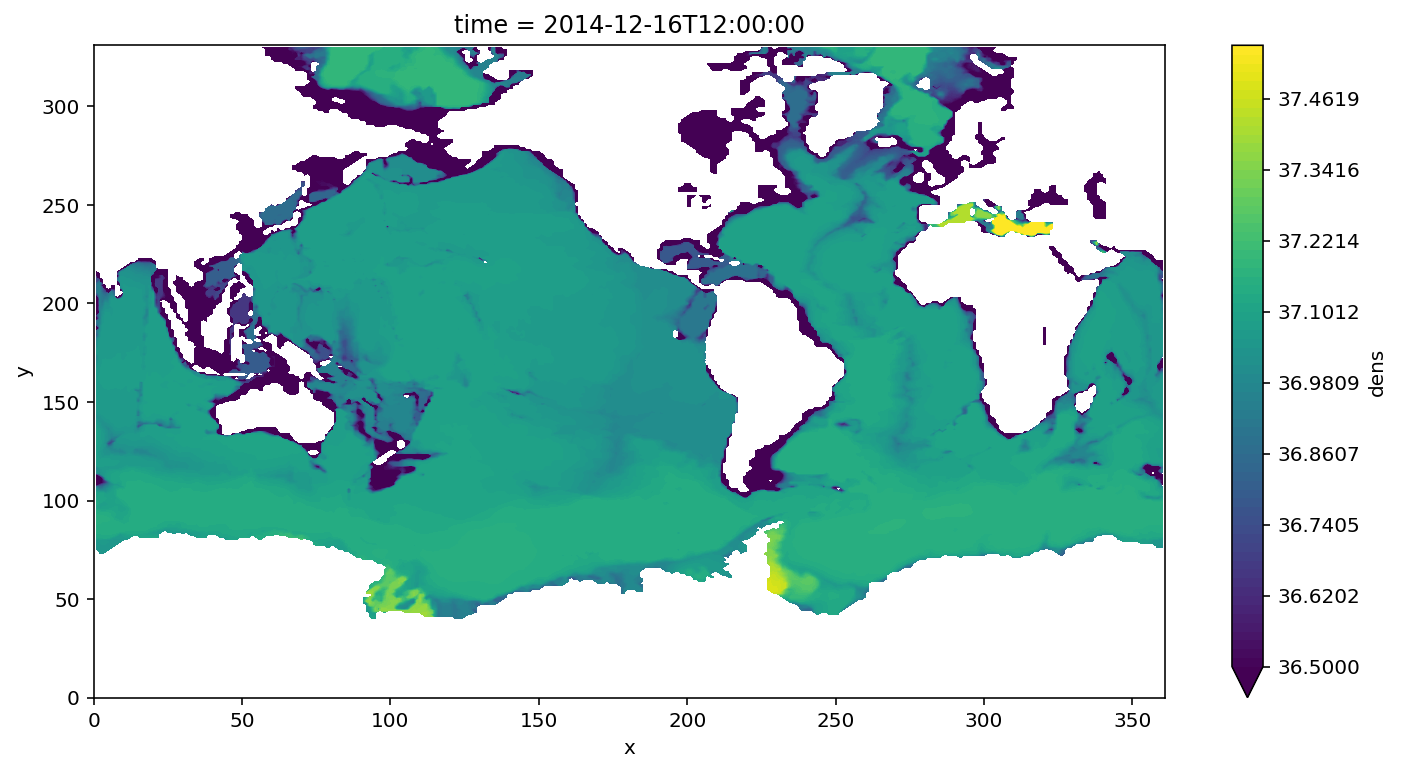

In [57]:
ds.dens.isel(time=-1).max([vert_var]).plot.contourf(vmin=36.5, levels=71)

The above logic assumes that the densest point is the deepest point. 

In [54]:
temp = ds.dens + ds.olevel

In [58]:
bottom_dens = ds.dens.where(temp==temp.max([vert_var])).max([vert_var]).isel(time=-1)

In [59]:
bottom_temp = ds.thetao.where(temp==temp.max([vert_var])).max([vert_var]).isel(time=-1)

In [60]:
bottom_salt = ds.so.where(temp==temp.max([vert_var])).max([vert_var]).isel(time=-1)

In [63]:
bottom_o2 = ds.o2.where(temp==temp.max([vert_var])).max([vert_var]).isel(time=-1)

In [61]:
bottom_dens.load()

/srv/conda/envs/notebook/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: All-NaN slice encountered
  return func(*args2)


<xarray.DataArray 'dens' (y: 332, x: 362)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
    nav_lat  (y, x) float32 -84.21071 -84.21071 -84.21071 ... 50.01094 50.01094
    nav_lon  (y, x) float32 72.5 73.5 74.5 75.5 ... 73.03703 73.0 72.98915
    time     datetime64[ns] 2014-12-16T12:00:00
Dimensions without coordinates: y, x

In [64]:
bottom_temp.load()
bottom_salt.load()
bottom_o2.load()

/srv/conda/envs/notebook/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: All-NaN slice encountered
  return func(*args2)
/srv/conda/envs/notebook/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: All-NaN slice encountered
  return func(*args2)


<xarray.DataArray 'o2' (y: 332, x: 362)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
    nav_lat  (y, x) float32 -84.21071 -84.21071 -84.21071 ... 50.01094 50.01094
    nav_lon  (y, x) float32 72.5 73.5 74.5 75.5 ... 73.03703 73.0 72.98915
    time     datetime64[ns] 2014-12-16T12:00:00
Dimensions without coordinates: y, x

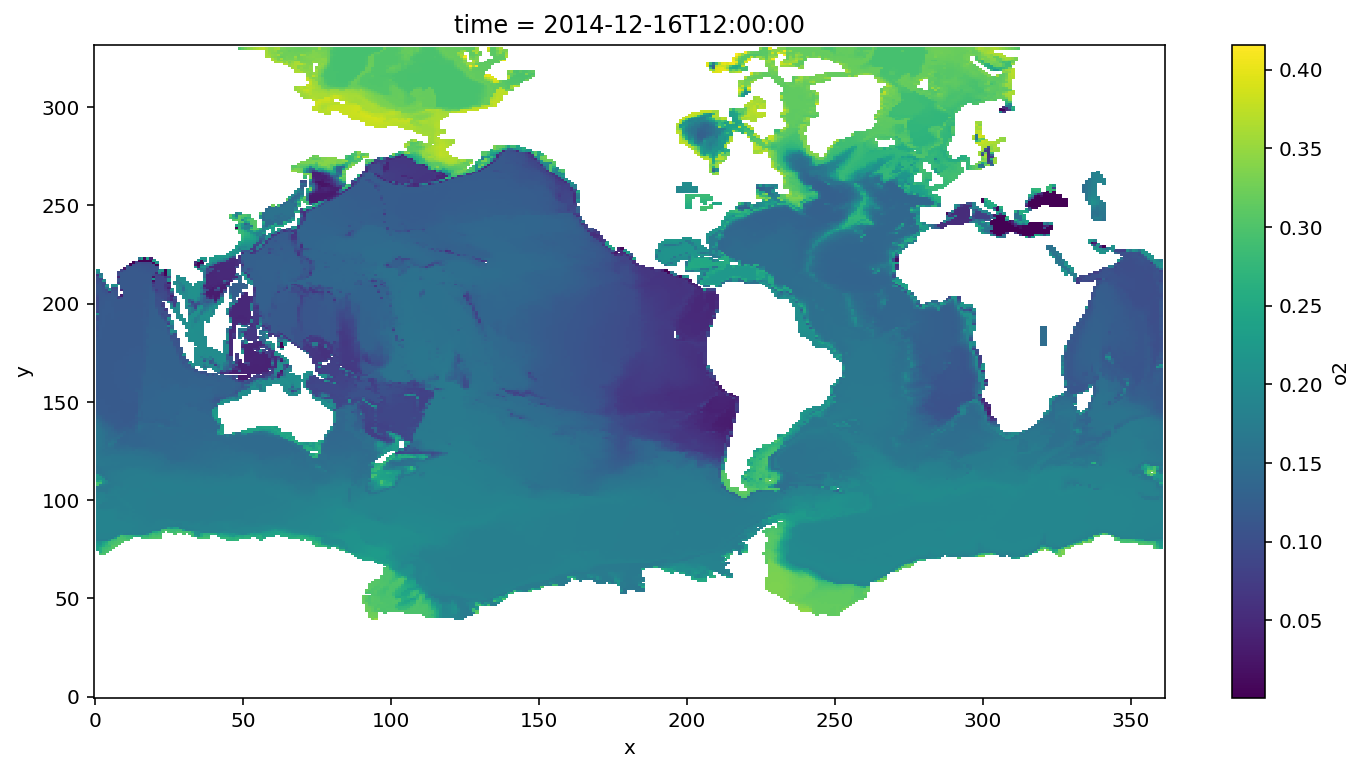

In [66]:
bottom_o2.plot()

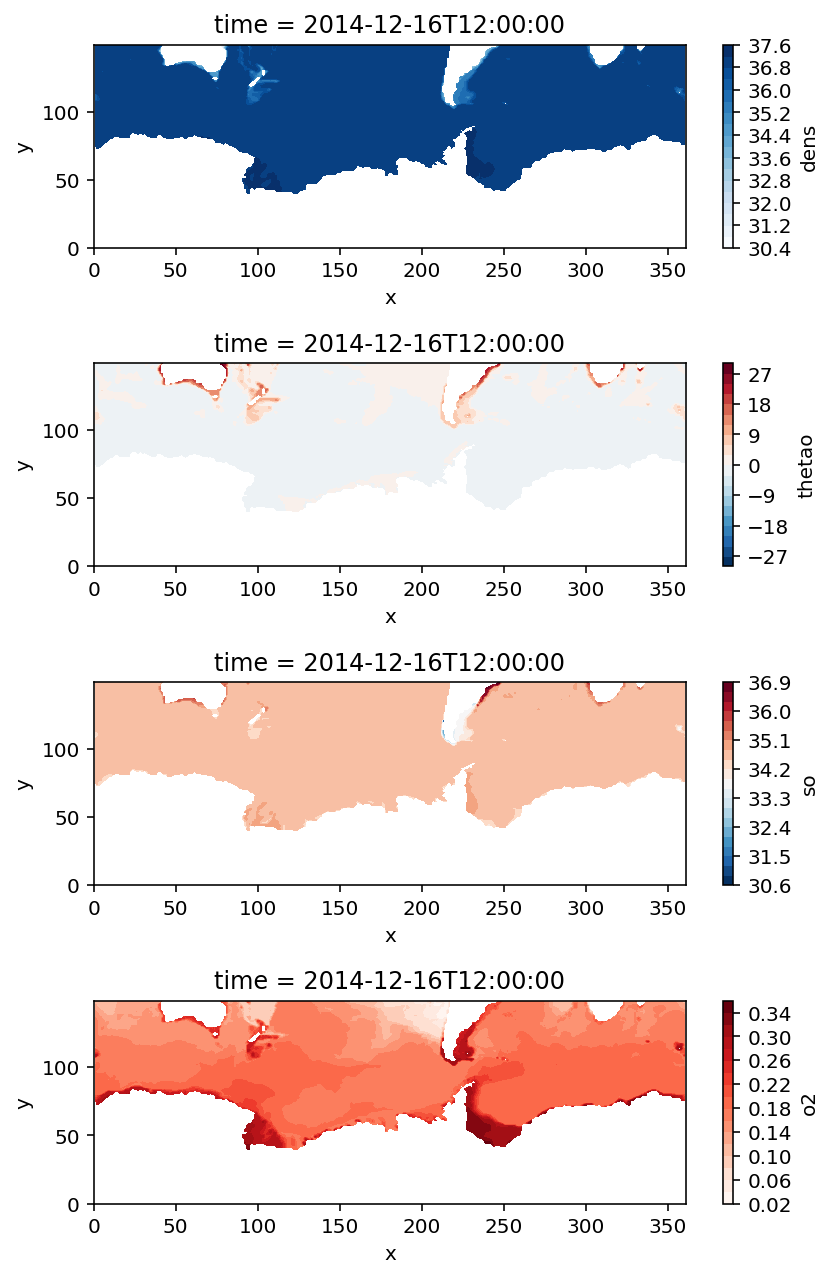

In [69]:
plt.figure(figsize=(6,9))

plt.subplot(411)
bottom_dens.sel(y=slice(0,150)).plot.contourf(levels=21, cmap='Blues')

plt.subplot(412)
bottom_temp.sel(y=slice(0,150)).plot.contourf(levels=21, cmap='RdBu_r')

plt.subplot(413)
bottom_salt.sel(y=slice(0,150)).plot.contourf(levels=21, cmap='RdBu_r')

plt.subplot(414)
bottom_o2.sel(y=slice(0,150)).plot.contourf( levels=21, cmap='Reds')

plt.tight_layout()

ValueError: dimensions or multi-index levels ['lat'] do not exist

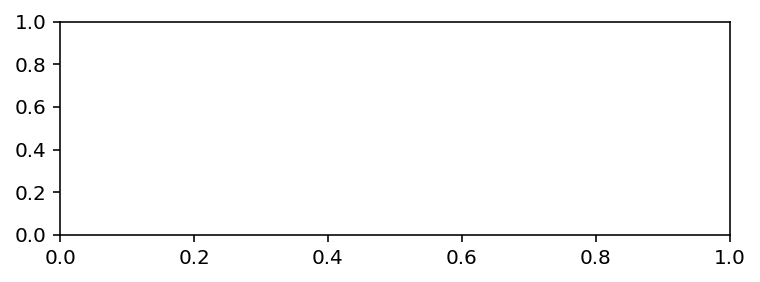

In [65]:
plt.figure(figsize=(6,9))

plt.subplot(411)
bottom_dens.sel(lat=slice(-80,-30)).plot.contourf(vmin=36.5, vmax=37,levels=21, cmap='Blues')

plt.subplot(412)
bottom_temp.sel(lat=slice(-80,-30)).plot.contourf(vmin=-2, vmax=2, levels=21, cmap='RdBu_r')

plt.subplot(413)
bottom_salt.sel(lat=slice(-80,-30)).plot.contourf(vmin=34.5, vmax=34.75, levels=21, cmap='RdBu_r')

plt.subplot(414)
bottom_o2.sel(lat=slice(-80,-30)).plot.contourf( levels=21, cmap='RdBu_r')

plt.tight_layout()

### Bottom Topography

!! Depth of bottom cell

/srv/conda/envs/notebook/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: All-NaN slice encountered
  return func(*args2)


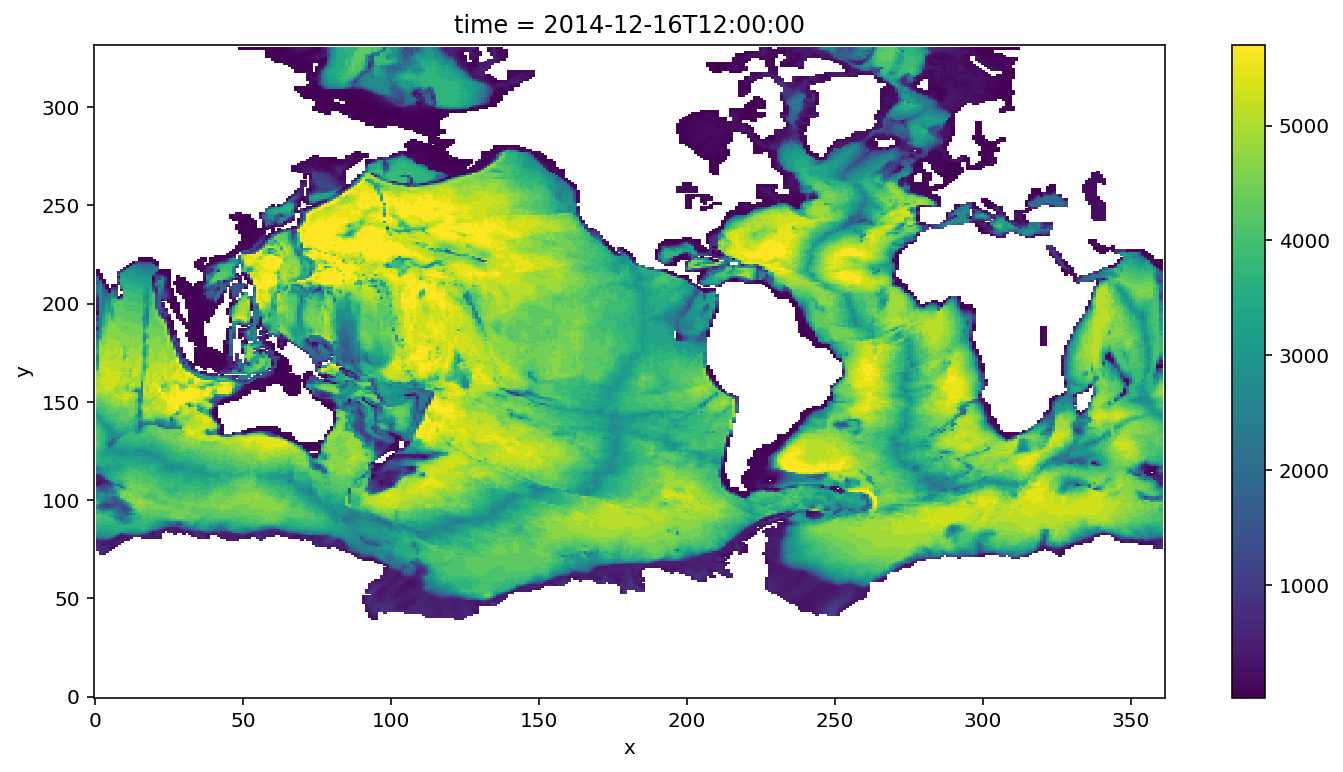

In [73]:
(temp- ds.dens).isel(time=-1).max([vert_var]).plot()

## Bottom topography

!!! Depth of cell below the bottom cell 
Slow matlabish way

In [ ]:
# Finding the depth of first cell that is nan (topography)

def calc_topo(ds, var_name): 
    """ function to calculate the approximate bathymetry in the model. 
        ds - some xarray with data from the model. Note only send in one timestep. 
        var_name  - some variable in the model that will be nan where there is topography. 
    """
    # make a 3d grid with Z as values
    depth3 = np.expand_dims(ds.lev.values, axis=1)
    depth3 = np.repeat(depth3, len(ds.lat), axis=1)
    depth3 = np.expand_dims(depth3, axis=2)
    depth3 = np.repeat(depth3, len(ds.lon), axis=2)
    
    A = ds[var_name].values
    B = np.isnan(A) # find where the nans are in a boolean array 
    
    topo = np.ones((len(ds.lat), len(ds.lon)))
    topo = topo*ds.lev[-1].values
    # this is going to be slow (but oh well!)
    for i in range(len(ds.lat)):
        for j in range(len(ds.lon)):
        
            temp = depth3[np.where(B[:,i,j]),i,j]
            
            if temp.shape[1]>0:
                topo[i,j] = np.min(temp)
    
    return xr.DataArray(topo, coords=[ds.lat, ds.lon])

In [ ]:
topo_xr = calc_topo(ds.isel(time=-1), 'dens')

In [ ]:
topo_xr.plot()

### Mixed Layer Depths

In [1]:
2+2

4